In [1]:
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()


In [2]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
#Building a classifier looking ONLY at petal width
X = iris['data'][:,3:] #X -- 150 x 1 column vector of petal width 
y = (iris['target']==2).astype(np.int) #Looking at a BINARY classifier
#to identify just Iris-Virginica (2) and OTHERS

X_true = X[iris['target']==2]
X_false = X[iris['target']!=2]

In [4]:
#Training a logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#New validation data set -- petal wihch are 0 to 3 cm 
X_new = np.linspace(0, 3, 1000).reshape(,-1)
print(np.shape(X_new))

(1, 1000)


In [6]:
y_proba = log_reg.predict_proba(X_new)

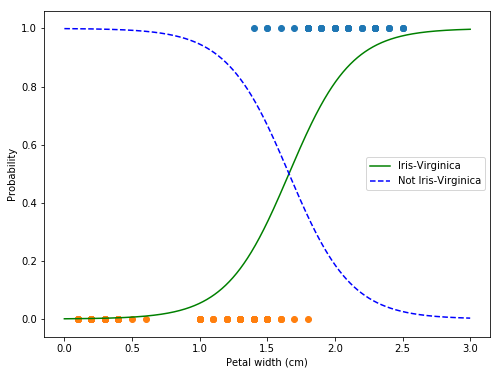

In [7]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.scatter(X_true,np.ones(len(X_true)))
plt.scatter(X_false,np.zeros(len(X_false)))
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend()